# Part 1: MAP

Write a program in python to implement the MAP (or regularization) for polynomial curve fitting problem. Follow the instructions below:

1. Generate 50 2D-data points using the following function: $y=sin(x^2+1)$
2. Add Gaussian random noise to the data
3. Show the original curve line and the noisy data.

In [1]:
import numpy as np  
import matplotlib.pyplot as plt

In [2]:
mu = 0
sigma = 0.05

In [3]:
# Generate Original Curve
def Original_Curve():
    x_curve = np.linspace(0, 1, 20)
    y_curve = np.sin(np.power(x_curve, 2) + 1)
    return x_curve, y_curve

In [4]:
# Generate Initial Noisy Data
def Noisy_Data():
    x_noise = np.linspace(0, 1, 50)
    y_init_noise = np.sin(np.power(x_noise, 2) + 1)
    return x_noise, y_init_noise

In [5]:
# Add Noise
def Add_Noise(mu, sigma, y):
    noise = np.random.normal(mu, sigma, 50)
    y_noise = y + noise
    return y_noise

In [6]:
x_curve, y_curve = Original_Curve()
x_noise, y_init_noise = Noisy_Data()
y_noise = Add_Noise(mu, sigma, y_init_noise)

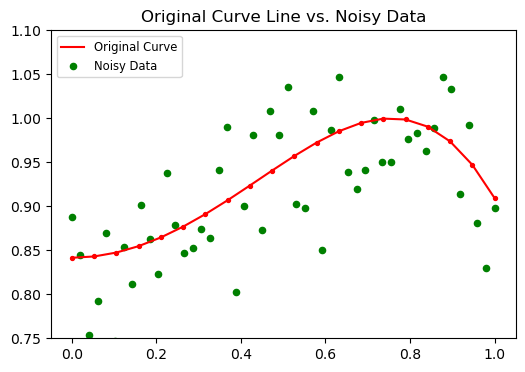

In [7]:
# Show the Original Curve Line and the Noisy Data.
plt.figure(figsize=(6, 4))
plt.plot(x_curve, y_curve, label='Original Curve', color='red')
plt.scatter(x_curve, y_curve, color='red', marker='o', s=8)
plt.scatter(x_noise, y_noise, label='Noisy Data', color='green', marker='o', s=20)
plt.title('Original Curve Line vs. Noisy Data')
plt.xlim(-0.05, 1.05)
plt.ylim(0.75, 1.10)
plt.legend(loc='upper left', fontsize='small')
plt.show()

The red line is the original curve based on the equation. The green dots are the noisy data.

4. Fit the generated noisy data using the MAP as discussed in class.
5. Compute and display the total absolute error value (between the predicted and the correct ones) of using the computed w.
6. Display the estimated values of w
7. Experiment with your code by changing M and alpha (the coefficient of the regularization/prior term) to various values, and then show the plots. On each the plot, you must show the values of M and alpha.

In [8]:
# Parameters Needed to Calculate the MAP Regression
def Parameters_for_MAP(x, y, M):
    xx = np.array([np.power(x[i], j) for i in range(50) for j in range(M)]).reshape(50, M)  # 
    t_bar = y
    I = np.identity(M)
    return xx, t_bar, I  # Unit Matrix

In [9]:
# Calculation for MAP Regression
def MAP_Calculation(xx, t_bar, I, alpha):
    w_bar = np.squeeze(np.dot(np.dot(np.linalg.inv(np.dot(xx.T, xx) + alpha * I), xx.T), t_bar))
    return w_bar

In [10]:
# Generate Estimated Values
def Estimated_Curve(xx, w_bar):
    y_bar = np.dot(xx, w_bar)
    return y_bar

In [11]:
def MAP_Regression(x_noise, y_noise, M, alpha):
    xx, t_bar, I = Parameters_for_MAP(x_noise, y_noise, M)
    w_bar = MAP_Calculation(xx, t_bar, I, alpha)
    y_bar = Estimated_Curve(xx, w_bar)
    return w_bar, y_bar, t_bar

Absolute Error: $TAE=\sum_{i=0}^{N}|y_i-t_i|$

In [12]:
# Calculate the Absolute Error
def Absolute_Error():
    w_bar, y_bar, t_bar = MAP_Regression(x_noise, y_noise, 5, 0.5)
    Error_Matrix = y_bar - t_bar
    TAE = np.sum(np.abs(Error_Matrix))
    MAE = TAE / 50
    return Error_Matrix, TAE, MAE

In [13]:
def Plot_Curves():
    # Show the Original Curve Line and the Noisy Data.
    plt.plot(x_curve, y_curve, label='Original Curve', color='red')
    plt.scatter(x_curve, y_curve, color='red', marker='o', s=8)
    plt.scatter(x_noise, y_noise, label='Noisy Data', color='green', marker='o', s=20)
    
    # Show the Estimated Curve
    plt.plot(x_noise, y_bar, label='Estimated Curve', color='blue')
    plt.title('MAP Regression Line (Blue Line) with M=%s, alpha=%s'%(M, alpha))
    plt.xlim(-0.05, 1.05)
    plt.ylim(0.75, 1.10)
    plt.legend(loc='upper left', fontsize='small')

In the calculation, the parameter in front of the unit matrix should be $\frac{\alpha}{\beta}$, where $\beta = \sigma^{2}$. Here, $\frac{\alpha}{\beta}$ is treated as a whole parameter and denoted to by $\alpha$.

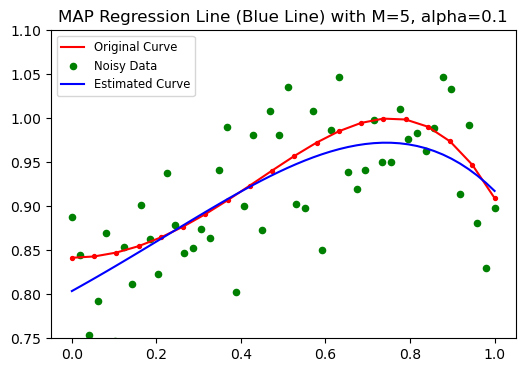

In [14]:
M = 5
alpha = 0.1
w_bar, y_bar, t_bar = MAP_Regression(x_noise, y_noise, M, alpha)
plt.figure(figsize=(6, 4))
Plot_Curves()
plt.show()

In [15]:
# Print Results
print('Weight Set w: ', w_bar)  #Display Values of Weight w_bar

Error_Matrix, TAE, MAE = Absolute_Error()
print('The Total Absolute Error:', TAE)  #Display Total Absolute Error
print('The Mean Absolute Error:', MAE)  #Display Mean Absolute Error

Weight Set w:  [ 0.80365937  0.2658872   0.09638869 -0.06082038 -0.18767738]
The Total Absolute Error: 2.338555059650585
The Mean Absolute Error: 0.0467711011930117


Changing M to Various Values

In [16]:
# Changing M to Various Values (Keep alpha=1e-12)
alpha = 1e-12
# Set the value of M to 2, 5, 10, 20, 50, 100
M_value = np.array([2, 5, 10, 20, 50, 100])

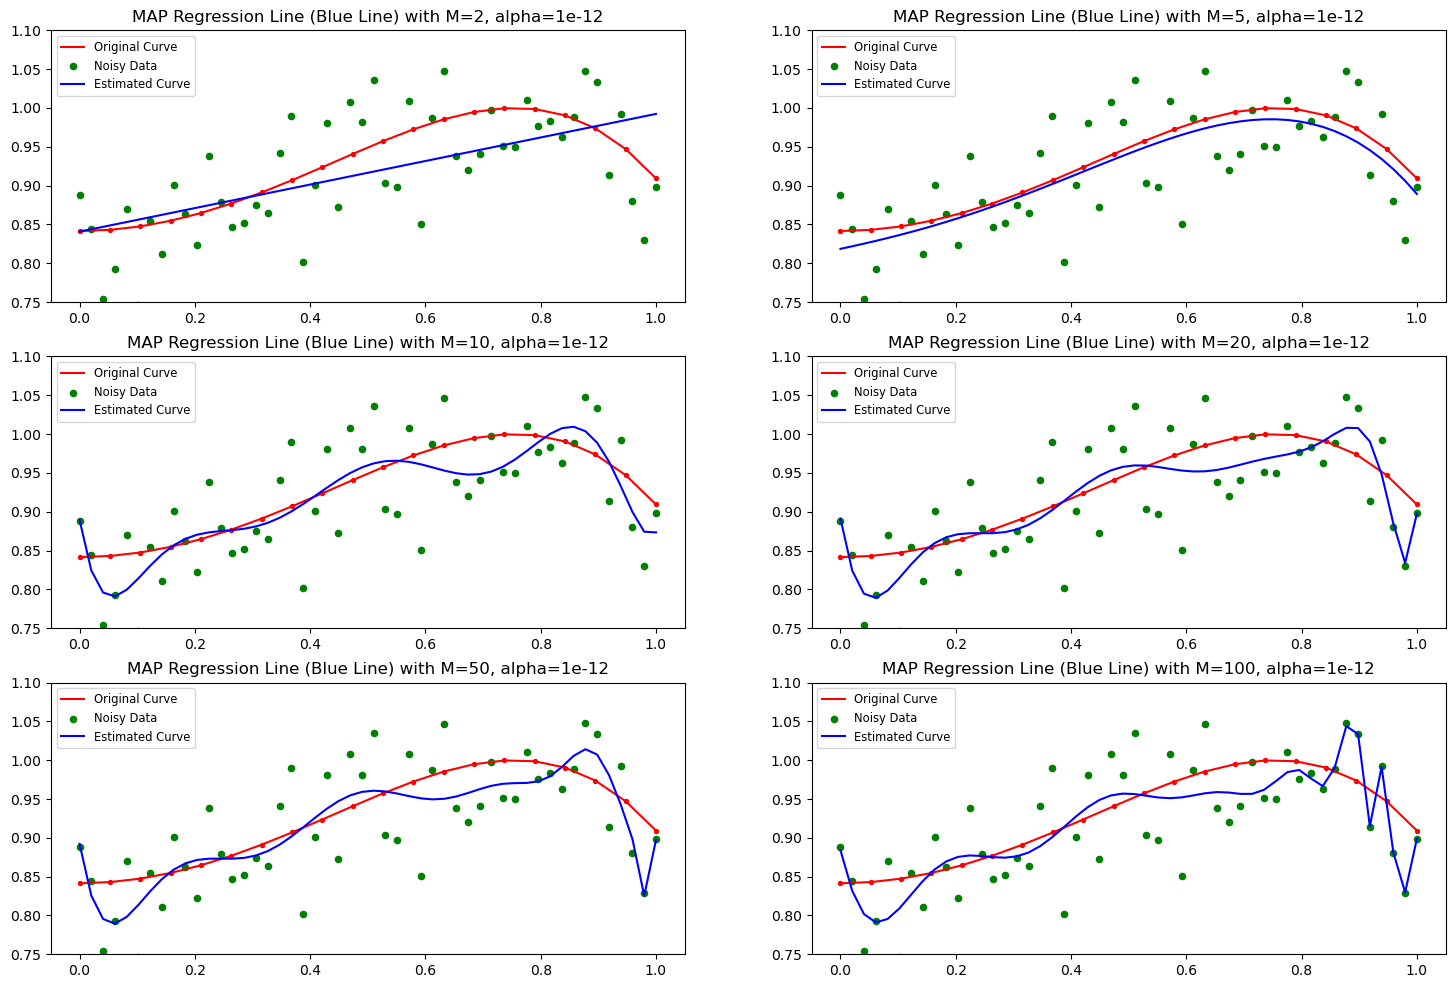

In [17]:
# Show the Estimated Value with Different M Value
plt.figure(figsize=(18, 12))
for i in range(len(M_value)):
    M = M_value[i]
    w_bar, y_bar, t_bar = MAP_Regression(x_noise, y_noise, M, alpha)
    plt.subplot(3, 2, i + 1)
    Plot_Curves()
plt.show()

Changing alpha to Various Values

In [18]:
# Changing alpha to Various Values (Keep M=20, overfitting)
M = 20
# Set the value of alpha to 1e-12, 1e-10, 1e-5, 1e-3, 0.1, 1
alpha_value = np.array([1e-12, 1e-10, 1e-5, 1e-3, 0.1, 1])

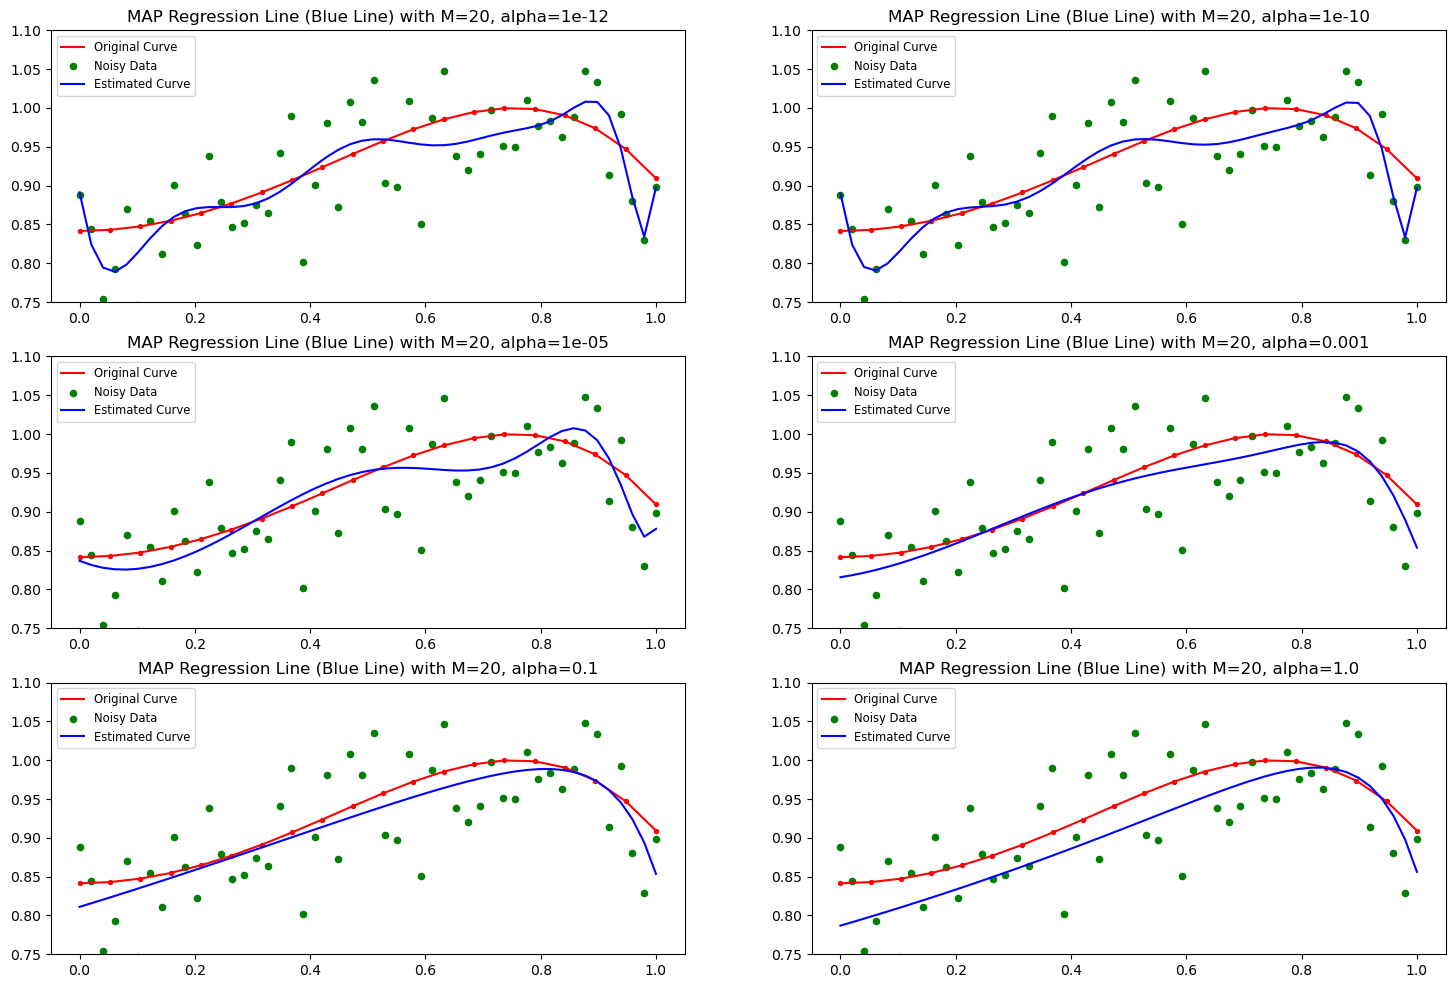

In [19]:
# Show the Estimated Value with Different alpha Value
plt.figure(figsize=(18, 12))
for i in range(len(alpha_value)):
    alpha = alpha_value[i]
    w_bar, y_bar, t_bar = MAP_Regression(x_noise, y_noise, M, alpha)
    plt.subplot(3, 2, i + 1)
    Plot_Curves()
plt.show()

In [20]:
# Changing alpha to Various Values (Keep M=5, proper-fitting)
M = 5

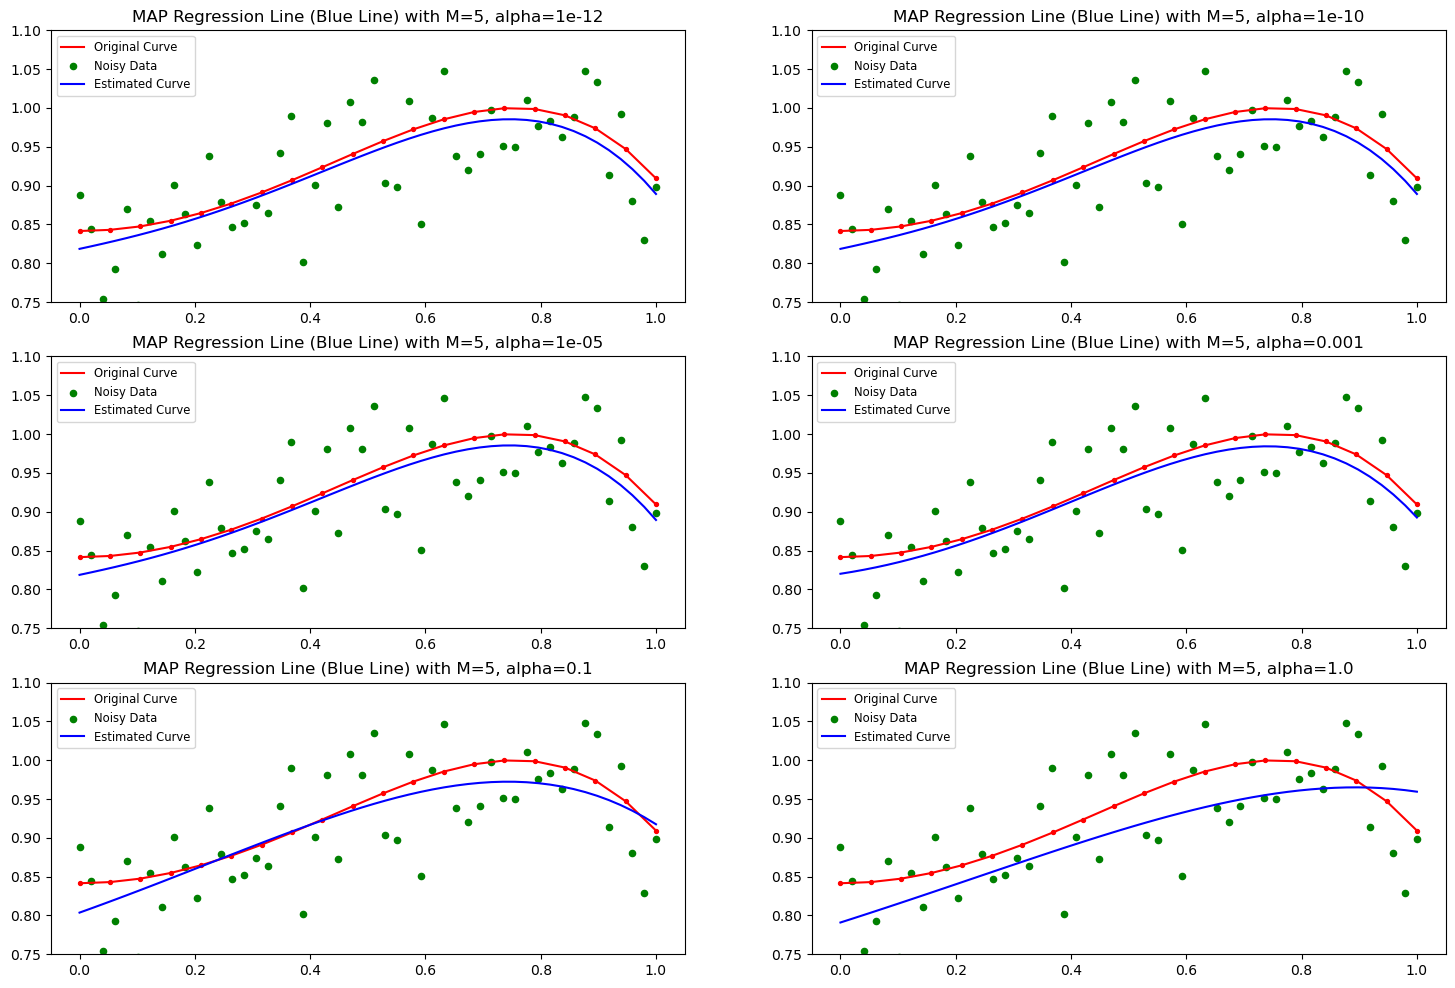

In [21]:
# Show the Estimated Value with Different alpha Value
plt.figure(figsize=(18, 12))
for i in range(len(alpha_value)):
    alpha = alpha_value[i]
    w_bar, y_bar, t_bar = MAP_Regression(x_noise, y_noise, M, alpha)
    plt.subplot(3, 2, i + 1)
    Plot_Curves()
plt.show()

In [22]:
# Changing alpha to Various Values (Keep M=2, underfitting)
M = 2

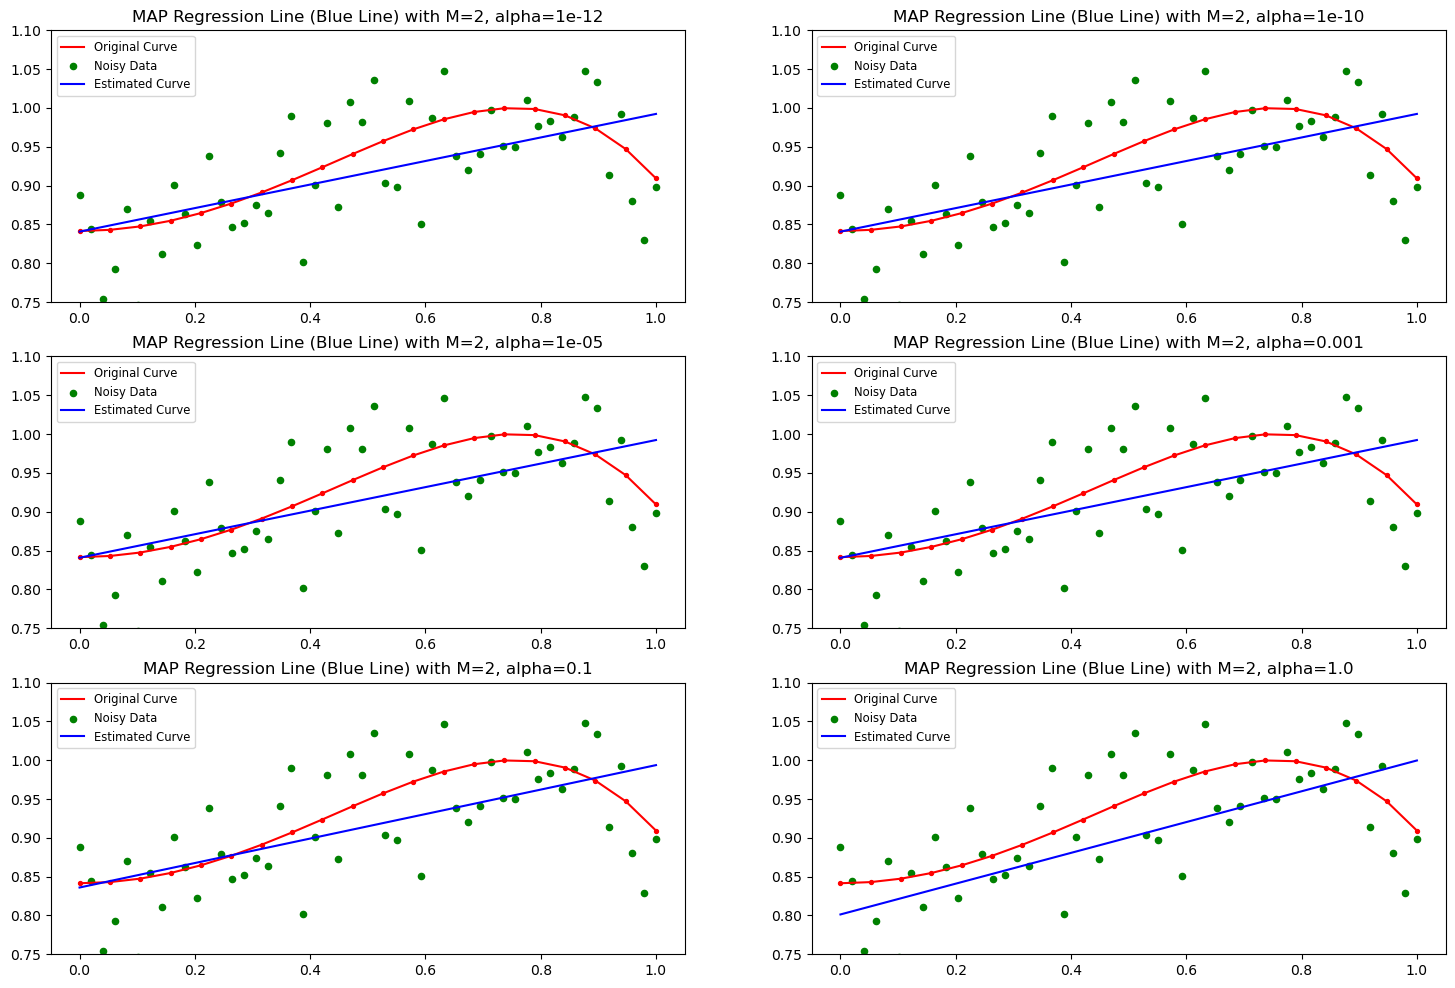

In [23]:
# Show the Estimated Value with Different alpha Value
plt.figure(figsize=(18, 12))
for i in range(len(alpha_value)):
    alpha = alpha_value[i]
    w_bar, y_bar, t_bar = MAP_Regression(x_noise, y_noise, M, alpha)
    plt.subplot(3, 2, i + 1)
    Plot_Curves()
plt.show()

8. From the experiment in #7, discuss how M and alpha influence on the fitting accuracy.

The choice of different polynomial orders M has an important effect on the fitting results for a given data sample. If the value of M is very small, the model is too simple, the results are underfitted and the convergence of the error function (objective function) is slow. Theoretically, as M increases, the higher the order of the polynomial, the smaller the value of the error function that can be obtained. However, if the value of M is too large, the model will be over-fitted. Although the value of the error function on the training set will be small, the generalisation will be poor.

α is the means used to prevent the model from overfitting. During the training process, on the one hand, we want to minimise the value of the error function, and inevitably the absolute value of w will be taken to a large value so that the model can fit the training sample points perfectly; on the other hand, if the absolute value of w is large, the value of ||w|| will become large again. The fitting curves obtained in this way are much smoother and therefore have the ability to generalise.